In [1]:
!pip install -Uqq fastai fastbook duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflow<3,>=2.9.0, but you have tensorflow

In [2]:
#hide
# ! [ -e /content ] && pip install -Uqq fastbook duckduckgo_search
#import fastbook
#fastbook.setup_book()

In [3]:
# from duckduckgo_search import ddg_images
from fastbook import *
from fastai.vision.widgets import *
# from fastcore.all import *

In [4]:
# Search DuckDuckGo
#
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [5]:
# Search for a grizzly with ddg
#
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [6]:
from duckduckgo_search import ddg_images
#from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [7]:
urls = search_images('grizzly photos', max_images=1)
urls[0]

Searching for 'grizzly photos'


'https://1.bp.blogspot.com/-cFjM_xcu1EI/WubmipnINuI/AAAAAAAAC-Q/S-ox0CeLE70D_aHRzWRc1wGIP2gz1XrfQCLcBGAs/w1200-h630-p-k-no-nu/grizzly.jpg'

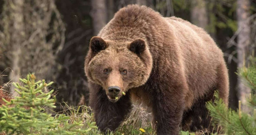

In [8]:
# Look at one image
#
#from fastdownload import download_url
dest = 'grizzly.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'black bear photos'


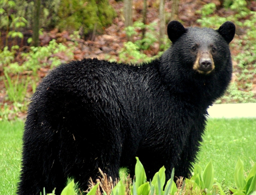

In [9]:
download_url(search_images('black bear photos', max_images=1)[0], 'blackbear.jpg', show_progress=False)
Image.open('blackbear.jpg').to_thumb(256,256)

Searching for 'teddy bear photos'


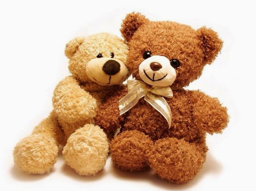

In [10]:
download_url(search_images('teddy bear photos', max_images=1)[0], 'teddybear.jpg', show_progress=False)
Image.open('teddybear.jpg').to_thumb(256,256)

In [11]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [12]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [13]:
fns = get_image_files(path)
fns

(#574) [Path('bears/grizzly/e7300dcb-9a36-450c-94d4-3905ff121bae.jpg'),Path('bears/grizzly/e2c66bf5-089b-4579-a084-96454ac30d06.jpg'),Path('bears/grizzly/4cad781f-5f15-4906-a90d-4658e275a354.jpg'),Path('bears/grizzly/2572d28c-74a6-4d2d-962c-a7286600eb84.jpg'),Path('bears/grizzly/2d1cacf9-0901-4ab9-9e0f-3b47fbf6a20e.jpg'),Path('bears/grizzly/73d7ee46-c62d-4549-96ba-462dd50bc0c5.jpg'),Path('bears/grizzly/87d4771b-d3b5-41c3-8370-6105faa5bf6b.jpg'),Path('bears/grizzly/ddba371e-6b34-42b6-a596-3ab03ee4a392.jpg'),Path('bears/grizzly/cb56b596-861d-4f92-9c4f-3547d3c5d8d1.jpg'),Path('bears/grizzly/053017fe-4244-4237-9c95-2a7ff1bad0fc.jpg')...]

In [14]:
failed = verify_images(fns)
failed

(#13) [Path('bears/grizzly/dee707dd-82ab-4eca-a9b0-d30326ba000b.jpg'),Path('bears/grizzly/4496e697-528d-4eab-ad22-0744c7a5d052.jpg'),Path('bears/grizzly/d4cff89a-cbc0-4b41-b83e-02d1f06dc8f3.jpg'),Path('bears/teddy/ee8b790a-b0ee-4464-8ac2-b30e02f6978e.jpg'),Path('bears/teddy/f0dfe8fc-73d2-4b2b-8bd0-e7d362c8e2aa.jpg'),Path('bears/teddy/89f6ad14-e73d-4fcc-a74d-1220cb24ad1e.jpg'),Path('bears/teddy/59acf17a-af97-4468-8706-ee92447628c1.jpg'),Path('bears/teddy/b49ef891-cdea-4a54-94e6-9b17a8ddd06d.jpg'),Path('bears/teddy/1d3a5481-aa86-4171-a932-6ce931b0a77d.jpg'),Path('bears/teddy/4ff84d49-3d7b-44ea-bc9d-b113a100ed47.jpg')...]

In [15]:
failed.map(Path.unlink);

In [16]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # 1
    get_items=get_image_files, # 2
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # 3
    get_y=parent_label, # 4
    item_tfms=Resize(128)) # 


In [17]:
dls = bears.dataloaders(path)

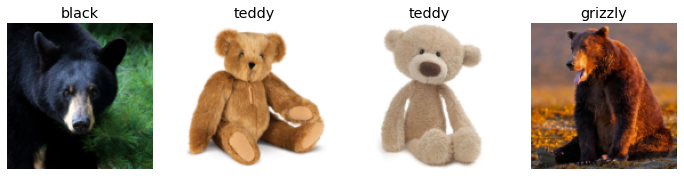

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

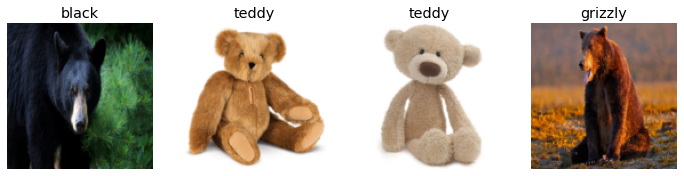

In [19]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

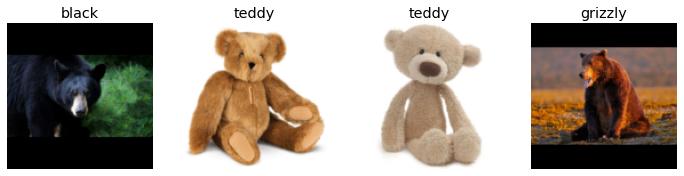

In [20]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

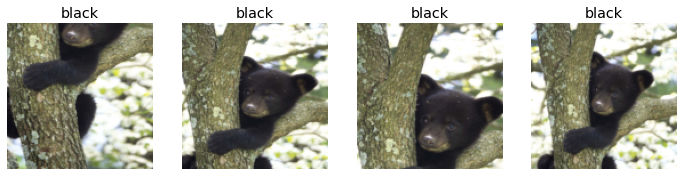

In [21]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

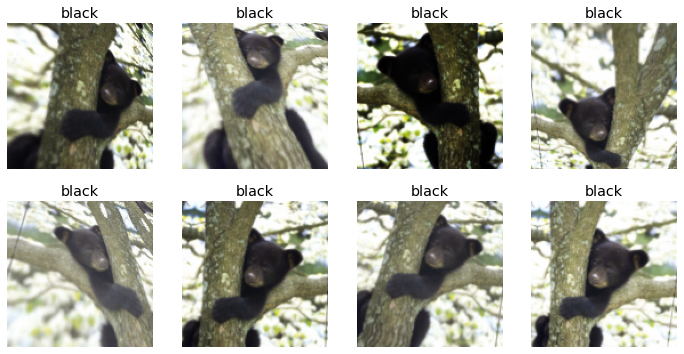

In [22]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [23]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [24]:
# Create the Learner and fine-tune it
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.030131,0.076245,0.026786,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.148255,0.038564,0.017857,00:43
1,0.119461,0.041026,0.017857,00:46
2,0.106314,0.072536,0.035714,00:46
3,0.084994,0.074272,0.035714,00:43


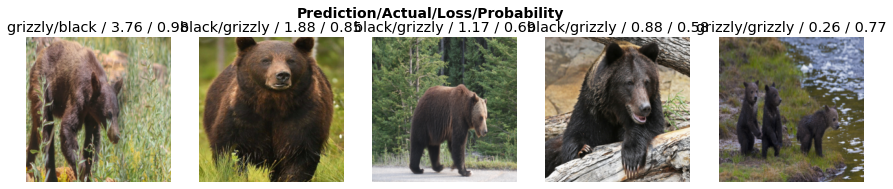

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5, nrows=1,)

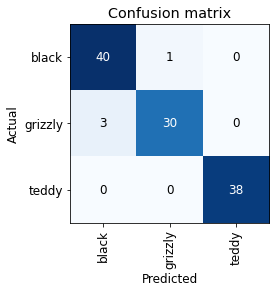

In [26]:
interp.plot_confusion_matrix()

In [27]:
# Data Cleaner
#
cleaner = ImageClassifierCleaner(learn)
cleaner

In [28]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [30]:
learn.export()

In [34]:
path = Path()
path.ls()

(#7) [Path('teddybear.jpg'),Path('bears'),Path('grizzly.jpg'),Path('blackbear.jpg'),Path('.virtual_documents'),Path('__notebook_source__.ipynb'),Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [35]:
learn_inf.predict('grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([3.1792e-03, 9.9681e-01, 1.1531e-05]))

In [38]:
learn_inf.dls.vocab[1]

'grizzly'

In [42]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [44]:
btn_upload = SimpleNamespace(data = ['grizzly.jpg'])

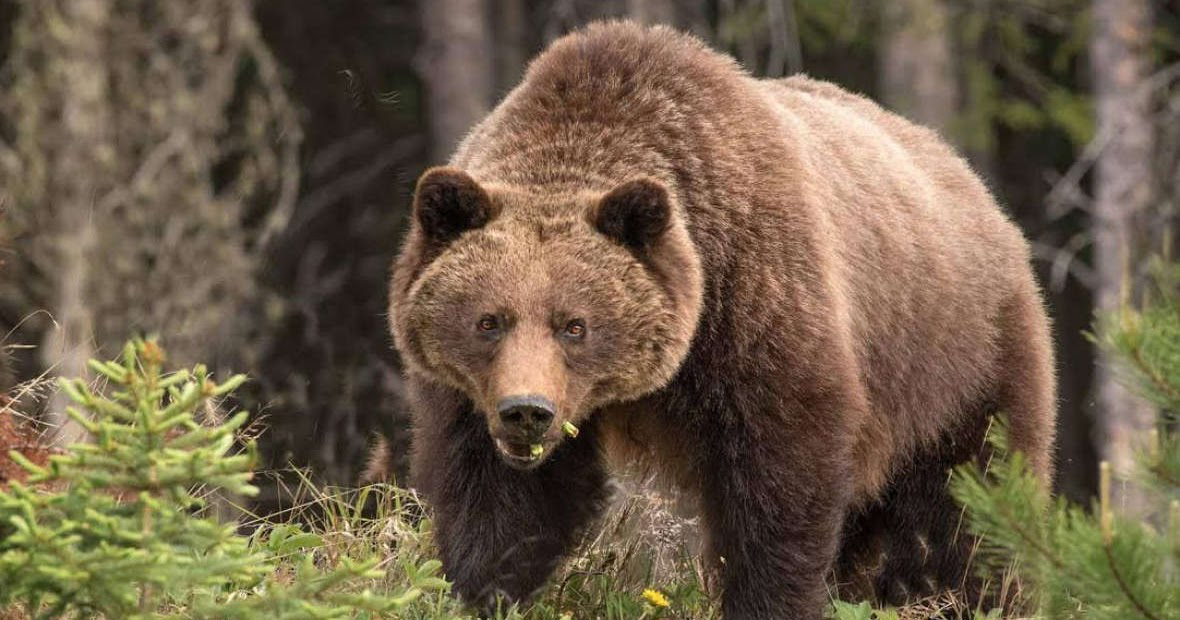

In [47]:
img = PILImage.create(btn_upload.data[-1])
img

In [48]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [49]:
pred,pred_idx,probs = learn_inf.predict(img)

In [50]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9968')

In [51]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

# Create Real App

In [52]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.3 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-core
    Found existing installation: jupyter-core 4.10.0
    Uninstalling jupyter-core-4.10.0:
      Successfully uninstalled jupyter-core-4.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.4.0 OK
